<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/02-01-03-glm-logistic-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)


## Overview

**Generalized Linear Models (GLMs)** with a Gaussian distribution are useful for modeling relationships between a continuous response variable and one or more explanatory variables when the error terms are normally distributed. This is a generalization of linear regression where the assumptions of `Gaussian` distribution apply. Here's an outline of the mathematical background and the steps to fit such a model.

1.  **Model Specification**:

    -   The model assumes that the dependent variable $Y$ follows a Gaussian (normal) distribution:
    
 $$ Y \sim \mathcal{N}(\mu, \sigma^2) $$

  -   Here, $\mu$ (the mean of $Y$) is modeled as a linear combination of predictors $X$, so:

 $$ \mu = X\beta $$

 -   Therefore, the model can be written as:

        $$ Y = X\beta + \epsilon $$

        where $\epsilon \sim \mathcal{N}(0, \sigma^2)$ represents the error term.

2.  **Link Function**:

    -   The identity link function is used for Gaussian models, meaning that we assume $E[Y | X] = X\beta$.

3.  **Parameter Estimation**:

    -   The coefficients $\beta$ are estimated by minimizing the sum of squared errors (SSE):

    $$ \text{SSE} = \sum_{i=1}^n (Y_i - X_i\beta)^2 $$

    -   The solution is given by:

    $$\beta = (X^T X)^{-1} X^T Y$$

    -   This is derived using calculus (specifically, by taking the derivative of SSE with respect to ( $\beta$ ), setting it to zero, and solving).

4.  **Prediction**:

    -   Once ( $\beta$ ) is estimated, we can predict new values of $Y$ as:

    $$ \hat{Y} = X\beta $$

5.  **Interpretation**:

    -   Each coefficient $\beta_j$ represents the change in $Y$ for a one-unit increase in $X_j$, holding other predictors constant.



# 1. Generalized Linear Regression (Gaussian)

In this tutorial, we will explore Generalized Linear Models (GLMs), focusing on the Gaussian distribution, one of the most commonly used in GLMs. These models extend linear regression, enabling us to analyze a wider range of data types and relationships. We will start with an overview of GLM structure, discussing the random component (distribution), systematic component (predictors), and link function (mean transformation). We will establish a solid understanding of the fundamentals by constructing a GLM model using synthetic data without built-in R packages. Next, we will fit a GLM using R’s `glm()` function, interpreting the output to assess the influence of predictors and their statistical significance. We will also evaluate model performance and use R’s visualization libraries to create helpful graphics to interpret our results. This tutorial will equip you with the theoretical foundation and practical skills to confidently apply Gaussian GLMs in R for various statistical modeling applications.




## GLM Regresion Model from Scratch

To fit a Generalized Linear Model (GLM) with a Gaussian distribution in R without using any packages, we’ll walk through each step, from generating synthetic data to estimating the model parameters and creating a summary statistics table. Let’s break down each mathematical concept and translate it into R code.

Steps to Fit the Model in R are below:

### Generate Synthetic Data

We'll start by generating synthetic data with four covariates and a continuous response variable.

1.  **Define Number of Observations**: ( $n$ = 100 ).

2.  **Generate Covariates** ($X_1, X_2, X_3, X_4$ ) from a normal distribution with mean ( 0 ) and standard deviation ( 1 ).

3.  **Specify True Coefficients**: Choose known values for the coefficients ($\beta_0$ = 5 ) (intercept), ($\beta$ = \[1.5, -2.0, 0.5, 3.0\]).

4.  **Generate the Response Variable (\$Y)** using the formula:

    $$ Y = \beta\_0 + \beta\_1 X_1 + \beta\_2 X_2 + \beta\_3 X_3 + \beta\_4 X_4 + \epsilon$$

where $\epsilon \sim N(0, 1)$ represents Gaussian noise.

In [8]:
# Step 1: Generate Synthetic Data
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)
n = 100

# Generate covariates
X1 = np.random.normal(0, 1, n)
X2 = np.random.normal(0, 1, n)
X3 = np.random.normal(0, 1, n)
X4 = np.random.normal(0, 1, n)

# Define true coefficients
beta_0 = 5
beta_true = np.array([1.5, -2.0, 0.5, 3.0])

# Generate response variable Y
Y = beta_0 + beta_true[0]*X1 + beta_true[1]*X2 + beta_true[2]*X3 + beta_true[3]*X4 + np.random.normal(0, 1, n)

### Define the Design Matrix ( $X$ )

To estimate the coefficients, we need a design matrix ($X$) that includes an intercept term. The matrix ($X$) will look like this:

$$ X =
\begin{bmatrix}
1 & X_{1,1} & X_{1,2} & X_{1,3} & X_{1,4} \\
1 & X_{2,1} & X_{2,2} & X_{2,3} & X_{2,4} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & X_{n,1} & X_{n,2} & X_{n,3} & X_{n,4}
\end{bmatrix} $$

where the first column is all ones for the intercept, and the remaining columns are values of the covariates ( \$X_1, X_2, X_3, X_4 \$) for each observation.

In [9]:
# Step 2: Define Design Matrix X with Intercept
X = np.column_stack((np.ones(n), X1, X2, X3, X4))
print("Design Matrix (first 5 rows):\n", X[:5])

Design Matrix (first 5 rows):
 [[ 1.          0.49671415 -1.41537074  0.35778736 -0.82899501]
 [ 1.         -0.1382643  -0.42064532  0.56078453 -0.56018104]
 [ 1.          0.64768854 -0.34271452  1.08305124  0.74729361]
 [ 1.          1.52302986 -0.80227727  1.05380205  0.61037027]
 [ 1.         -0.23415337 -0.16128571 -1.37766937 -0.02090159]]



### Estimate Coefficients Using the Normal Equation

For Gaussian GLMs, estimating the coefficients ( $\beta$) reduces to solving the **Normal Equation**:

$$\hat{\beta} = (X^T X)^{-1} X^T Y$$

**Compute** $X^TX$: This is the matrix product of the transpose of ($X$) with ($X$).

**Compute** $(X^T X)^{-1}$: Invert the result from step 1.

**Compute** $X^T Y$: This is the product of the transpose of $X$ and the response vector ($Y$ ).

**Solve for** $\hat{\beta}$: Multiply the results from step 2 with step 3 to obtain the estimated coefficients.


In [10]:
# Step 3: Estimate Coefficients Using Normal Equation
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
XtY = X.T @ Y
beta_hat = XtX_inv @ XtY
print("Estimated Coefficients:\n", beta_hat)

Estimated Coefficients:
 [ 4.91119594  1.43078038 -1.79572418  0.41362802  3.24953456]


### Calculate Fitted Values and Residuals

-   \*\*Fitted Values $\hat{Y}$: Using the estimated coefficients $\hat{\beta}$, calculate the fitted values as:

$$ \hat{Y} = X \hat{\beta}$$

-   **Residuals**: Calculate the residuals, which represent the difference between the observed values $Y$ and fitted values $\hat{Y}$:

$$ \text{residuals} = Y - \hat{Y} $$


In [11]:
# Step 4: Calculate Fitted Values and Residuals
Y_hat = X @ beta_hat
residuals = Y - Y_hat
print("Residuals (first 5):\n", residuals[:5])

Residuals (first 5):
 [-0.9443495  -0.2459933   0.1159585   0.34380454 -0.458299  ]


### Compute Mean Squared Error (MSE) and Variance of Residuals

The Mean Squared Error (MSE) measures the average of the squared residuals:

$$\text{MSE} = \frac{1}{n}\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$

The variance of the residuals, used for calculating standard errors, is given by:

$$ \text{Var(residuals)} = \frac{1}{n - p - 1}\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$

where ($p$ ) is the number of covariates (in our case, ( p = 4)

In [12]:
# Step 5: Calculate MSE and Variance of Residuals
mse = np.mean(residuals**2)
p = 4  # Number of covariates
variance_residuals = np.sum(residuals**2) / (n - len(beta_hat))

print(f"Mean Squared Error (MSE): {mse}")
print(f"Variance Residuals: {variance_residuals}")


Mean Squared Error (MSE): 1.0118140458194602
Variance Residuals: 1.0650674166520633


### Calculate Standard Errors and t-values for Coefficients

-   **Standard Errors**: The standard error for each coefficient ( \hat{\beta}\_j ) is given by:

$$ \text{Std Error}(\hat{\beta}*j) =* \sqrt{\text{Var(residuals)} \times [ (X^T X)^{-1} ]_{jj} } $$

where ( $[(X^T X)^{-1}]{jj}$ is the $j-th$ diagonal element of the inverse of $X^T X$\$

-   **t-values**: The t-value for each coefficient tests the null hypothesis that the coefficient is zero. It is calculated as:

$$t\text{-value} = \frac{\hat{\beta}_j}{\text{Std Error}(\hat{\beta}_j)}$$

In [ ]:
!pip install pandas scikit-learn matplotlib

In [13]:
import pandas as pd
import numpy as np

# Step 6: Calculate Standard Errors and t-values
std_errors = np.sqrt(variance_residuals * np.diag(XtX_inv))
t_values = beta_hat / std_errors

# Create Summary Table
summary_table = pd.DataFrame({
    'Coefficient': beta_hat,
    'Std Error': std_errors,
    't-value': t_values
})
print("Summary Table:\n", summary_table)


Summary Table:
    Coefficient  Std Error    t-value
0     4.911196   0.104764  46.878525
1     1.430780   0.119263  11.996806
2    -1.795724   0.109889 -16.341312
3     0.413628   0.097509   4.241942
4     3.249535   0.119226  27.255343


### Model Performance

Evaluating a Generalized Linear Model (GLM) involves several key metrics to assess its fit and predictive power. Below, I’ll outline the main evaluation metrics commonly used for a Gaussian GLM, along with their calculations.


#### Evaluation Matrix


1. ***Mean Squared Error (MSE)***:
   - Measures the average of the squares of the errors (residuals), which is the difference between the predicted and actual values.
   
   $$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 $$

2. ***Root Mean Squared Error (RMSE)***:

   - The square root of MSE, providing an error metric in the same units as the response variable.
   
   $$ \text{RMSE} = \sqrt{\text{MSE}} $$
   

3. ***Mean Absolute Error (MAE)***:

   - Measures the average absolute errors, providing a straightforward interpretation of the average error magnitude.

   $$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |Y_i - \hat{Y}_i|$$


4. ***R-squared ($R^2$)***:

   - Indicates the proportion of variance in the response variable that can be explained by the model.

   $$ R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}  $$
   where:
   
   - $\text{SS}_{\text{res}} = \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 $
   - $\text{SS}_{\text{tot}} = \sum_{i=1}^{n} (Y_i - \bar{Y})^2 $

5. ***Adjusted R-squared***:

   - Adjusts the R-squared value based on the number of predictors in the model, providing a more accurate assessment when comparing models.
   
   $$ \text{Adjusted } R^2 = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - p - 1} \right) $$
   
   where  $p$ is the number of predictors.

6. ***Akaike Information Criterion (AIC)***:

   - Provides a measure of model quality that accounts for the number of parameters.
   
   $$  \text{AIC} = n \log\left(\frac{\text{SS}_{\text{res}}}{n}\right) + 2p  $$

7. ***Bayesian Information Criterion (BIC)***:

   - Similar to AIC but with a larger penalty for models with more parameters.
   
   $$   \text{BIC} = n \log\left(\frac{\text{SS}_{\text{res}}}{n}\right) + p \log(n)$$
   

In [14]:
# Step 7: Model Performance Metrics
# MSE (already calculated)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(Y - Y_hat))

# R-squared
ss_res = np.sum((Y - Y_hat)**2)
ss_tot = np.sum((Y - np.mean(Y))**2)
r_squared = 1 - (ss_res / ss_tot)

# Adjusted R-squared
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1)) / (n - p - 1)

# AIC
aic = n * np.log(ss_res / n) + 2 * (p + 1)  # +1 for intercept

# BIC
bic = n * np.log(ss_res / n) + (p + 1) * np.log(n)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")
print(f"Akaike Information Criterion (AIC): {aic}")
print(f"Bayesian Information Criterion (BIC): {bic}")

Mean Squared Error (MSE): 1.0118140458194602
Root Mean Squared Error (RMSE): 1.0058896787518303
Mean Absolute Error (MAE): 0.8010848719693233
R-squared: 0.9263958410884733
Adjusted R-squared: 0.9232967186079879
Akaike Information Criterion (AIC): 11.174480479106633
Bayesian Information Criterion (BIC): 24.200331409047088



#### K-fold Cross-validation

-   **Split the Data**: Randomly divide the dataset into $K$ equal-sized folds.

-   **Training and Testing**:

    -   For each fold, use $k-1$ folds for training the model and the remaining fold for testing.

    -   Repeat this process $k$ times, ensuring that each fold serves as the test set once.

-   **Model Fitting**: Fit the GLM on the training set for each iteration.

-   **Prediction**: Use the fitted model to make predictions on the test set.

-   **Performance Metrics**: Calculate evaluation metrics (e.g., MSE, RMSE, MAE, etc.) for each fold.

-   **Aggregate Results**: Compute the average and standard deviation of the performance metrics across all folds

In [15]:
# Step 8: K-fold Cross-Validation
k = 10
folds = np.random.choice(k, n, replace=True)
cv_mse = np.zeros(k)

for i in range(k):
    test_indices = np.where(folds == i)[0]
    train_indices = np.setdiff1d(np.arange(n), test_indices)
    
    X_train, Y_train = X[train_indices], Y[train_indices]
    X_test, Y_test = X[test_indices], Y[test_indices]
    
    # Fit model on training data
    XtX_train = X_train.T @ X_train
    XtX_inv_train = np.linalg.inv(XtX_train)
    XtY_train = X_train.T @ Y_train
    beta_hat_train = XtX_inv_train @ XtY_train
    
    # Predict on test set
    Y_pred = X_test @ beta_hat_train
    
    # Calculate MSE for this fold
    cv_mse[i] = np.mean((Y_test - Y_pred)**2)

average_cv_mse = np.mean(cv_mse)
print(f"Average K-Fold Cross-Validation MSE: {average_cv_mse}")

Average K-Fold Cross-Validation MSE: 1.0960584555061874


#### 1:1 Plot Predicted vs Observed Values

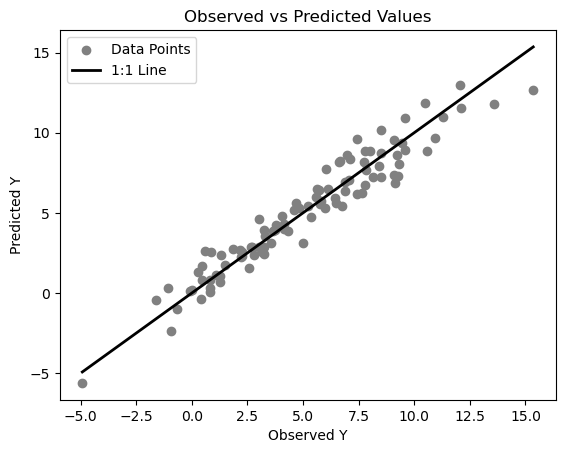

In [16]:
import matplotlib.pyplot as plt

# Plot Observed vs Predicted Values
plt.scatter(Y, Y_hat, c='grey', marker='o', label='Data Points')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k-', lw=2, label='1:1 Line')
plt.xlabel('Observed Y')
plt.ylabel('Predicted Y')
plt.title('Observed vs Predicted Values')
plt.legend()
plt.show()

## GLM Regression Model  with Python

In Python, GLMs can be implemented using the {statsmodels} library, which supports various distribution families (e.g., Gaussian, Poisson, Binomial) and link functions (e.g., identity, log, logit).

In [67]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

### Data

The **Boston** dataset from the `MASS` package in R contains housing data for 506 census tracts of Boston from the 1970s. It is used for regression, with the goal of predicting median house values (`medv`). The dataset includes 14 variables such as crime rate (`crim`), proportion of residential land (`zn`), air pollution (`nox`), average rooms per dwelling (`rm`), and socioeconomic status (`lstat`). Notably, it includes the variable `chas` (Charles River dummy) and `black` (index related to Black population). Due to ethical concerns over some variables, the dataset is primarily used for educational purposes and should not be used for real-world inference.

In [35]:
# Load Boston dataset from OpenML
boston = fetch_openml(name='boston', version=1, as_frame=True, parser='pandas')
df = boston.frame

# Select relevant columns
df = df[['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

# Convert CHAS to category and ensure RAD/TAX are float
df['CHAS'] = df['CHAS'].astype('category')
df['RAD'] = df['RAD'].astype(float)
df['TAX'] = df['TAX'].astype(float)

print("Data loaded. First 5 rows:")
print(df.head())

Data loaded. First 5 rows:
   MEDV     CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  24.0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  21.6  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  34.7  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  33.4  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  36.2  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


#### Summary Statistics

In [36]:
num_cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
summary = df[num_cols].describe().T
summary['iqr'] = summary['75%'] - summary['25%']
print("Summary statistics with IQR:")
print(summary[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'iqr']])

Summary statistics with IQR:
               mean         std        min         25%        50%         75%  \
CRIM       3.613524    8.601545    0.00632    0.082045    0.25651    3.677083   
ZN        11.363636   23.322453    0.00000    0.000000    0.00000   12.500000   
INDUS     11.136779    6.860353    0.46000    5.190000    9.69000   18.100000   
NOX        0.554695    0.115878    0.38500    0.449000    0.53800    0.624000   
RM         6.284634    0.702617    3.56100    5.885500    6.20850    6.623500   
AGE       68.574901   28.148861    2.90000   45.025000   77.50000   94.075000   
DIS        3.795043    2.105710    1.12960    2.100175    3.20745    5.188425   
TAX      408.237154  168.537116  187.00000  279.000000  330.00000  666.000000   
PTRATIO   18.455534    2.164946   12.60000   17.400000   19.05000   20.200000   
LSTAT     12.653063    7.141062    1.73000    6.950000   11.36000   16.955000   
MEDV      22.532806    9.197104    5.00000   17.025000   21.20000   25.000000   

#### Correlation

In [37]:
correlations = df[num_cols].corr()['MEDV'].sort_values(ascending=False)
print("Correlation with MEDV:")
print(correlations)

Correlation with MEDV:
MEDV       1.000000
RM         0.695360
ZN         0.360445
DIS        0.249929
AGE       -0.376955
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


#### Boxplot and Jitter Plots

In [28]:
# !pip install seaborn

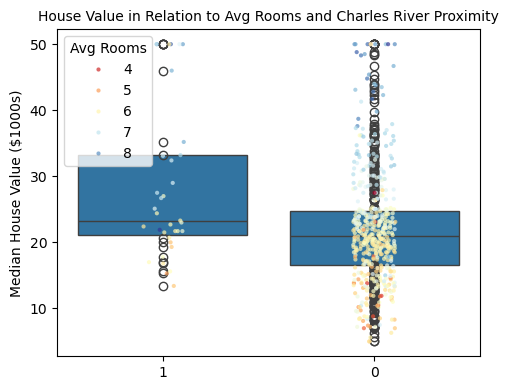

In [38]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, y='MEDV', x='CHAS', whis=0, showcaps=False)
sns.stripplot(data=df, y='MEDV', x='CHAS', hue='RM', size=3, jitter=True, palette='RdYlBu', alpha=0.7)

plt.title("House Value in Relation to Avg Rooms and Charles River Proximity", fontsize=10)
plt.ylabel("Median House Value ($1000s)")
plt.xlabel("")
plt.legend(title="Avg Rooms", fontsize=10, title_fontsize=10)
plt.gca().invert_xaxis()  # mimic coord_flip
plt.tight_layout()
plt.show()


### Data Loading and Preparation

We will apply following operation before fit a GLM regression model.

1.  **Feature engineering**: Feature engineering is a vital task in the data preparation process for data analysis, particularly for machine learning models. It is the practice of creating new features from existing ones or transforming them to enhance the machine learning algorithm's performance. Doing so makes achieving higher accuracy, better generalization, and a more straightforward interpretation of the model possible. Some standard techniques used in feature engineering include dimensionality reduction, feature scaling, and feature extraction. When performing feature engineering, it is essential to consider the data type, distribution, and target variable, among other factors.

We will create a new feature (Sand_Silt) by adding soil Silt and Sand percentage

2.  **Convert to factors**: As Land_type is categorical variable representing distinct categories rather than numerical values, we need to convert them into factors. This process will allow us to analyze and interpret the data more accurately, facilitating a better understanding of the underlying patterns and trends.

3.  **Data normalization**: It is a technique used in data analysis and machine learning. It involves adjusting numerical values to a standard range, usually between 0 and 1 or with a mean of 0 and a standard deviation of 1. This helps to improve the efficiency and accuracy of machine learning algorithms. Data normalization is important because it helps machine learning models work better. By standardizing the data, the models can more easily identify patterns and relationships in the data, which leads to better predictions and results.

In [ ]:
# Create working copy
mf = df.copy()

# Feature engineering
mf['crim_lstat'] = mf['CRIM'] + mf['LSTAT']

# Drop original features
mf = mf.drop(columns=['CRIM', 'LSTAT'])

# Rename CHAS -> chas, MEDV -> medv (for formula API)
mf.rename(columns={'CHAS': 'chas', 'MEDV': 'medv'}, inplace=True)

# Reorder: move medv and chas after crim_lstat
cols = mf.columns.tolist()
crim_lstat_idx = cols.index('crim_lstat')
if 'medv' in cols:
    cols.insert(crim_lstat_idx + 1, cols.pop(cols.index('medv')))
if 'chas' in cols:
    cols.insert(crim_lstat_idx + 1, cols.pop(cols.index('chas')))
mf = mf[cols]

# Normalize numerical features (exclude chas and medv)
num_features = [col for col in mf.columns if col not in ['chas', 'medv']]
scaler = MinMaxScaler()import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
mf[num_features] = scaler.fit_transform(mf[num_features])

# Convert chas to string to avoid patsy categorical issues
mf['chas'] = mf['chas'].astype(str)

#### Split Data



In [ ]:
# Stratify by chasimport pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
train = pd.DataFrame()
test = pd.DataFrame()

for chas_val in ['0', '1']:
    subset = mf[mf['chas'] == chas_val]
    train_part, test_part = train_test_split(subset, train_size=0.7, random_state=101, shuffle=True)
    train = pd.concat([train, train_part], ignore_index=True)
    test = pd.concat([test, test_part], ignore_index=True)

# Define X and y
X_train = train.drop(columns=['medv'])import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
y_train = train['medv']

X_test = test.drop(columns=['medv'])
y_test = test['medv']

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (353, 12), y_train: (353,)
X_test: (153, 12), y_test: (153,)


**Stratified random sampling** is a technique for selecting a representative sample from a population, where the sample is chosen in a way that ensures that certain subgroups within the population are adequately represented in the sample.

### Fit a GLM Regression Model

In the context of a GLM with continuous response variables, the focus is on regression problems where the dependent variable, which is being predicted, is continuous. This implies that the variable can take any value within a specific range, and the objective is to identify a correlation between the dependent variable and the independent variables that can be used to make accurate predictions.




In [ ]:
%pip install statsmodels    

In [41]:

# Recombine for formula interface
train_with_y = X_train.copy()
train_with_y['medv'] = y_train

# Define formula
formula = "medv ~ ZN + INDUS + NOX + RM + AGE + DIS + TAX + PTRATIO + chas + crim_lstat"

# Fit model
model = smf.glm(formula=formula, data=train_with_y, family=sm.families.Gaussian()).fit()

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   medv   No. Observations:                  353
Model:                            GLM   Df Residuals:                      342
Model Family:                Gaussian   Df Model:                           10
Link Function:               Identity   Scale:                          22.444
Method:                          IRLS   Log-Likelihood:                -1044.4
Date:                Mon, 11 Aug 2025   Deviance:                       7675.9
Time:                        11:56:19   Pearson chi2:                 7.68e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9047
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.2479      2.299     11.419      0.0

#### Model Summary: Deviance, AIC, Pseudo R²

In [42]:
print(f"Null Deviance: {model.null_deviance:.2f}")
print(f"Residual Deviance: {model.deviance:.2f}")
print(f"AIC: {model.aic:.2f}")

# Pseudo R²
pseudo_r2 = 1 - (model.deviance / model.null_deviance)
print(f"Pseudo R²: {pseudo_r2:.3f}")

Null Deviance: 26292.34
Residual Deviance: 7675.92
AIC: 2110.79
Pseudo R²: 0.708


### Plot Coefficients with 95% Confidence Intervals    

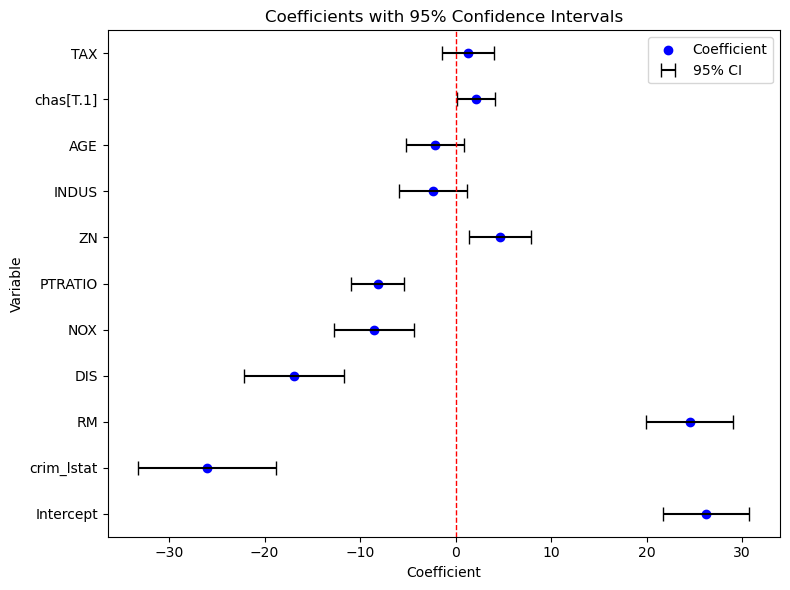

In [ ]:
# Extract coefficients and confidence intervals
coef_table = model.summary2().tables[1]
coefs = np.array(coef_table['Coef.'])
ci_lower = np.array(coef_table['[0.025'])
ci_upper = np.array(coef_table['0.975]'])
variables = coef_table.index

# Create DataFrame for plotting
plot_data = pd.DataFrame({
    'Variable': variables,
    'Coef': coefs,
    'CI_Lower': ci_lower,
    'CI_Upper': ci_upper
})

# Sort by absolute coefficient value
plot_data = plot_data.sort_values(by='Coef', key=abs, ascending=False)

# Convert to NumPy arrays to avoid pandas indexing issues
coefs = np.array(plot_data['Coef'])
ci_lower = np.array(plot_data['CI_Lower'])
ci_upper = np.array(plot_data['CI_Upper'])
variables = np.array(plot_data['Variable'])

# Plot unstandardized coefficients with CIs
plt.figure(figsize=(8, 6))
y_pos = np.arange(len(variables))
plt.scatter(coefs, y_pos, color='blue', label='Coefficient')
plt.errorbar(
    x=coefs,
    y=y_pos,
    xerr=(coefs - ci_lower, ci_upper - coefs),
    fmt='none',
    c='black',
    capsize=5,
    label='95% CI'
)import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.yticks(y_pos, variables)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.title('Coefficients with 95% Confidence Intervals')
plt.legend()
plt.tight_layout()
plt.show()


### Model Diagnostics


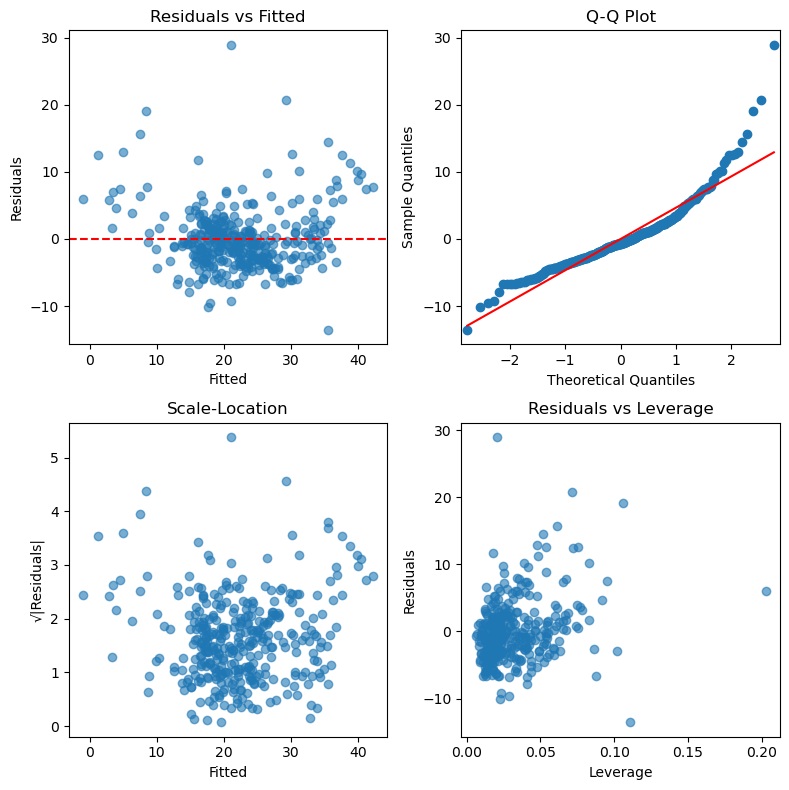

In [44]:
residuals = model.resid_deviance
fitted = model.fittedvalues

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

axes[0,0].scatter(fitted, residuals, alpha=0.6)
axes[0,0].axhline(0, color='red', linestyle='--')
axes[0,0].set_xlabel('Fitted'); axes[0,0].set_ylabel('Residuals')
axes[0,0].set_title('Residuals vs Fitted')

sm.qqplot(residuals, line='s', ax=axes[0,1])
axes[0,1].set_title('Q-Q Plot')

axes[1,0].scatter(fitted, np.sqrt(np.abs(residuals)), alpha=0.6)
axes[1,0].set_xlabel('Fitted'); axes[1,0].set_ylabel('√|Residuals|')
axes[1,0].set_title('Scale-Location')

influence = model.get_influence()
leverage = influence.hat_matrix_diag
axes[1,1].scatter(leverage, residuals, alpha=0.6)
axes[1,1].set_xlabel('Leverage'); axes[1,1].set_ylabel('Residuals')
axes[1,1].set_title('Residuals vs Leverage')

plt.tight_layout()
plt.show()

### Adjusted Predictions

In [62]:
def predict_response(model, data, scaler, rm_feature_name='RM', chas_values=['0', '1']):
    pred_data = []
    # Use original (unscaled) RM range
    rm_min_orig = 3.5  # min from Boston dataset
    rm_max_orig = 8.7  # max from Boston dataset
    rm_range_orig = np.linspace(rm_min_orig, rm_max_orig, 50)

    for val_rm_orig in rm_range_orig:
        # Scale RM to match training data
        num_features = [col for col in data.columns if col not in ['chas', 'medv']]
        # Create a "template" row of means (in scaled space)
        row_scaled = data.select_dtypes(include=[np.number]).mean().to_dict()

        # Replace RM with scaled version of original value
        val_rm_scaled = (val_rm_orig - 3.5) / (8.7 - 3.5)  # min-max normalize
        row_scaled['RM'] = val_rm_scaled

        for chas_val in chas_values:
            row_scaled['chas'] = chas_val
            try:
                pred = model.predict(pd.DataFrame([row_scaled]))[0]
            except Exception as e:
                print(f"Error predicting for RM={val_rm_orig}, chas={chas_val}: {e}")
                continue
            pred_data.append({
                'RM': val_rm_orig,        # Use original scale
                'chas': chas_val,
                'predicted': pred
            })
    return pd.DataFrame(pred_data)

# Call function
rm_chas = predict_response(model, X_test, scaler=scaler)
rm_chas['chas'] = rm_chas['chas'].map({'0': 'No', '1': 'Yes'})  # Now safe

# Convert to clean NumPy arrays for plotting
rm_chas_clean = pd.DataFrame({
    'RM': rm_chas['RM'].to_numpy().astype(float),
    'predicted': rm_chas['predicted'].to_numpy().astype(float),
    'chas': rm_chas['chas'].astype(str)
})

print("Cleaned NumPy arrays (correct scale):")
for key, value in rm_chas_clean.items():
    print(f"{key}: {value.iloc[:5].tolist()} ...")  # Show first 5

Cleaned NumPy arrays (correct scale):
RM: [3.5, 3.5, 3.6061224489795918, 3.6061224489795918, 3.7122448979591836] ...
predicted: [8.88524862588134, 11.02255207142983, 9.38548797528731, 11.5227914208358, 9.885727324693283] ...
chas: ['No', 'Yes', 'No', 'Yes', 'No'] ...


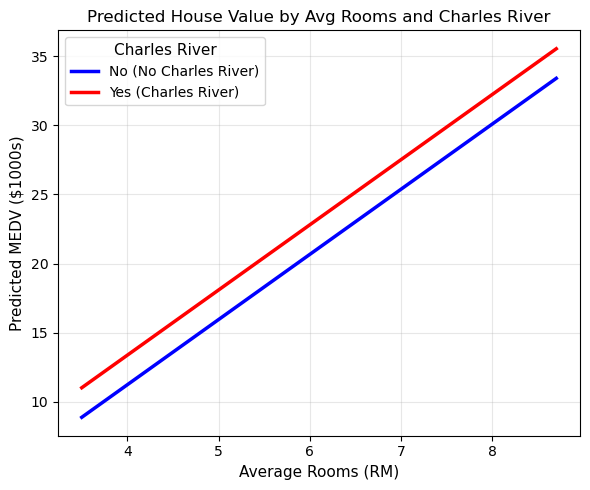

In [77]:
# Extract clean NumPy arrays
rm_vals = rm_chas_clean['RM'].to_numpy()
pred_vals = rm_chas_clean['predicted'].to_numpy()
chas_vals = rm_chas_clean['chas'].to_numpy()

# Separate data by chas
chas_no_mask = chas_vals == 'No'
chas_yes_mask = chas_vals == 'Yes'

# Plot with matplotlib only
plt.figure(figsize=(6, 5))

plt.plot(
    rm_vals[chas_no_mask], pred_vals[chas_no_mask],
    label='No (No Charles River)',
    linewidth=2.5,
    color='blue'
)

plt.plot(
    rm_vals[chas_yes_mask], pred_vals[chas_yes_mask],
    label='Yes (Charles River)',
    linewidth=2.5,
    color='red'
)

# Customize
plt.title("Predicted House Value by Avg Rooms and Charles River", fontsize=12)
plt.xlabel("Average Rooms (RM)", fontsize=11)
plt.ylabel("Predicted MEDV ($1000s)", fontsize=11)
plt.legend(title="Charles River", fontsize=10, title_fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Cross-validation

In [70]:
from sklearn.model_selection import KFold

def k_fold_cv_glm(df, formula, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    cv_mse = []
    predicted_values = np.zeros(len(df))
    for train_idx, test_idx in kf.split(df):
        train_fold = df.iloc[train_idx]
        test_fold = df.iloc[test_idx]
        model_cv = smf.glm(formula=formula, data=train_fold, family=sm.families.Gaussian()).fit()
        pred = model_cv.predict(test_fold)
        mse = mean_squared_error(test_fold['medv'], pred)
        cv_mse.append(mse)
        predicted_values[test_idx] = pred
    return {'average_mse': np.mean(cv_mse), 'predicted_values': predicted_values}

cv_result = k_fold_cv_glm(mf, formula, k=5)
mf['Pred_medv'] = cv_result['predicted_values']
print(f"CV MSE: {cv_result['average_mse']:.3f}")



CV MSE: 27.035


### Predict on Test Data

In [72]:
test['Pred_medv'] = model.predict(test)
test_metrics = {
    'RMSE': np.sqrt(mean_squared_error(test['medv'], test['Pred_medv'])),
    'MAE': mean_absolute_error(test['medv'], test['Pred_medv']),
    'MSE': mean_squared_error(test['medv'], test['Pred_medv']),
    'MDAE': median_absolute_error(test['medv'], test['Pred_medv']),
    'R2': r2_score(test['medv'], test['Pred_medv'])
}

print("Test Performance:")
print(pd.DataFrame([test_metrics]))

Test Performance:
       RMSE       MAE       MSE      MDAE        R2
0  5.986124  3.788539  35.83368  2.326564  0.664477


### 1:1 Plot



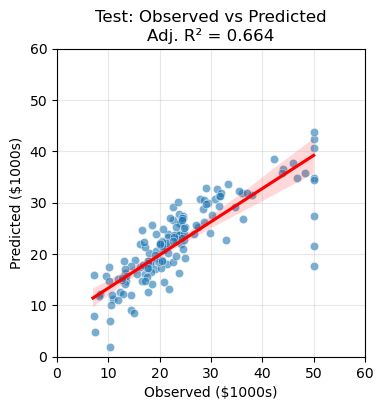

In [81]:
plt.figure(figsize=(5, 4))

sns.scatterplot(x='medv', y='Pred_medv', data=test, alpha=0.6)
sns.regplot(x='medv', y='Pred_medv', data=test, scatter=False, color='red')

r2_test = r2_score(test['medv'], test['Pred_medv'])


plt.title(f"Test: Observed vs Predicted\nAdj. R² = {r2_test:.3f}")
plt.xlabel("Observed ($1000s)")
plt.ylabel("Predicted ($1000s)")
plt.xlim(0, 60); plt.ylim(0, 60)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, alpha=0.3)
plt.show()



## Summary and Conclusion


This comprehensive tutorial covered the essentials of conducting Generalized Linear Model (GLM) regression analysis with a Gaussian distribution with Python, from foundational concepts to advanced interpretation and evaluation techniques. We began by introducing the structure and key components of GLMs, particularly those that use the Gaussian distribution, and explored their suitability for continuous data. Building a GLM model from scratch allowed us to understand the model’s structure, including the linear predictors, error terms, and link functions.

Next, we used Python’s `statsmodels` library to fit a Gaussian GLM more efficiently and compared it with the simpler `lm()` function, which directly applies to linear models. The tutorial guided interpreting model outputs, including understanding coefficients, statistical significance, and key model metrics. For this, we leveraged a range of powerful Python packages such as `statsmodels`, `scikit-learn`, and `matplotlib` to streamline and enhance our interpretation and visualization of GLM outputs, making it easier to extract meaningful insights from the model.

We then addressed model performance evaluation using cross-validation and a hold-out test data set, demonstrating how these methods help assess model generalization and prevent overfitting. By using cross-validation and a separate test data set, we ensured a robust and unbiased estimate of model performance, essential for applying the model confidently to new data.
We also explored the visualization of model assumptions, including residuals analysis, to validate the model's fit and identify potential issues. This step is crucial for ensuring that the assumptions underlying GLMs are met, which enhances the reliability of our conclusions.

Finally, we discussed the importance of marginal effects and adjusted predictions in interpreting complex models, especially when dealing with interaction terms or transformed variables. These techniques provide a clearer understanding of how predictors influence the response variable, making it easier to communicate results to stakeholders.




## References

1. [Statsmodels Documentation – GLM](https://www.statsmodels.org/stable/glm.html)


2. [Introduction to Statistical Learning with Python" (ISLP) – Chapter 4 & 7](https://www.statlearning.com/)


3. [Seabold, Skipper, and Josef Perktold – "Statsmodels: Econometric and Statistical Modeling with Python" (SciPy 2010)](https://doi.org/10.25080/Majora-92bf1922-00a)

4. [Data School – "Statistical Modeling in Python with Statsmodels" (YouTube + Blog)](https://www.dataschool.io/)



